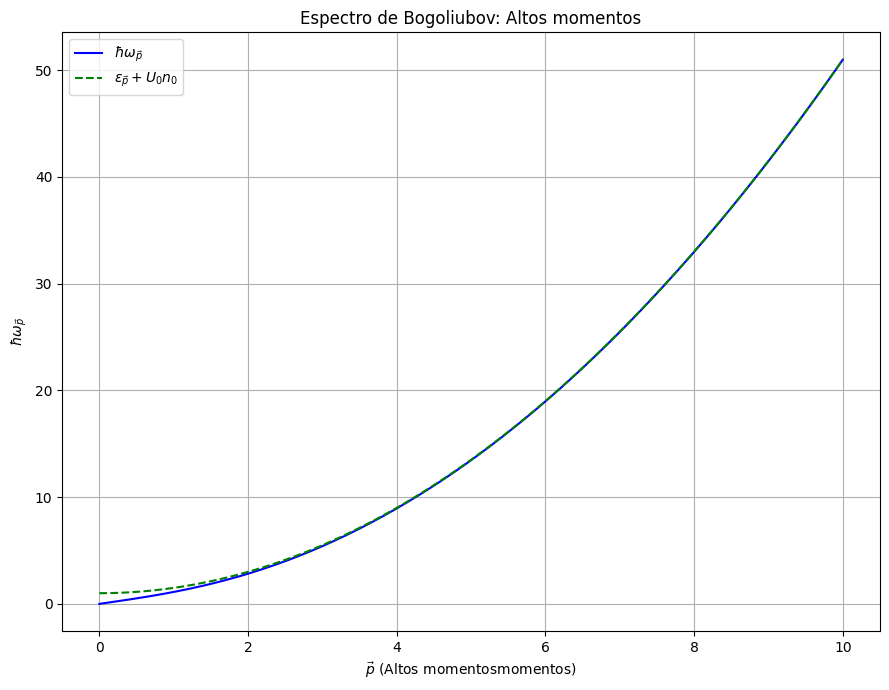

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
hbar = 1.0  # Constante de Planck reducida (en unidades naturales)
m = 1.0     # Masa de las partículas
U0 = 1.0     # Constante de interacción
n0 = 1.0    # Densidad del condensado

# Función para calcular la energía de Bogoliubov
def bogoliubov_energy(k, U0, n0, m):
    epsilon_k = (hbar**2 * k**2) / (2 * m)  # Energía cinética
    return np.sqrt(epsilon_k * (epsilon_k + 2 * U0 * n0))

# Rango de momentos (k)
k_low = np.linspace(0, 1, 500)  # Bajos momentos (k -> 0)
k_high = np.linspace(0, 10, 500)  # Altos momentos (k -> ∞)

# Cálculo del espectro de excitaciones
omega_low = bogoliubov_energy(k_low, U0, n0, m)
omega_high = bogoliubov_energy(k_high, U0, n0, m)


plt.figure(figsize=(9, 7))
plt.plot(k_high, omega_high, label=r'$\hbar \omega_{\vec{p}}$', color='blue')
plt.plot(k_high, (hbar**2 * k_high**2) / (2 * m) + U0 * n0, '--', label=r'$\epsilon_{\vec{p}} + U_0n_0$', color='green')
plt.xlabel(r'${\vec{p}}$ (Altos momentosmomentos)')
plt.ylabel(r'$\hbar \omega_{\vec{p}}$')
plt.title('Espectro de Bogoliubov: Altos momentos')
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()

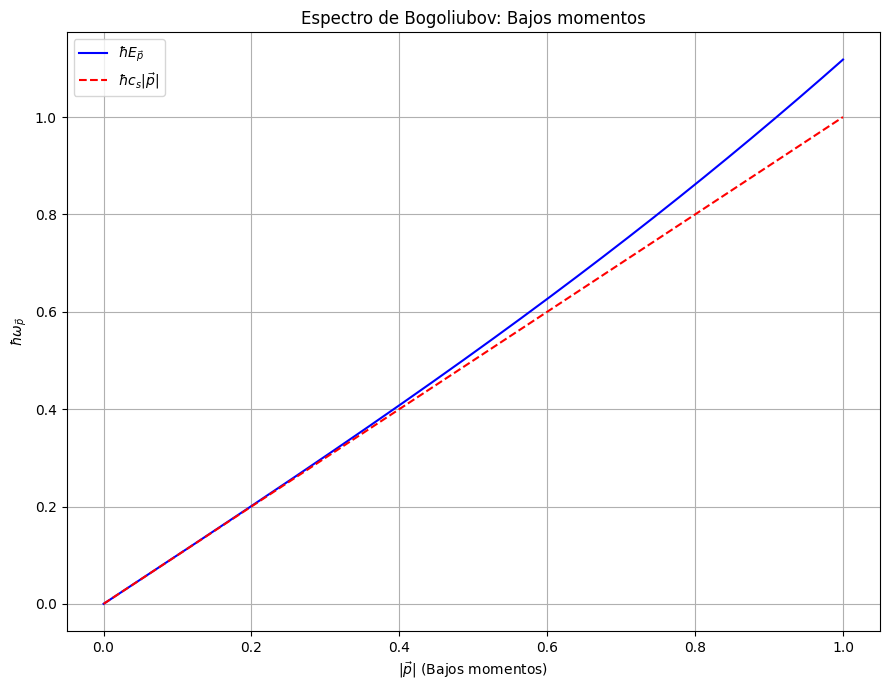

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
hbar = 1.0
m = 1.0
U0 = 1.0
n0 = 1.0

# Función del espectro de Bogoliubov
def bogoliubov_energy(k, U0, n0, m):
    epsilon_k = (hbar**2 * k**2) / (2 * m)
    return np.sqrt(epsilon_k * (epsilon_k + 2 * U0 * n0))

# Velocidad del sonido en el límite k -> 0
c = np.sqrt(n0 * U0 / m)

# Rango pequeño de momentos (bajos k)
k_low = np.linspace(0, 1, 500)
omega_low = bogoliubov_energy(k_low, U0, n0, m)
lineal = c * k_low  # Aproximación lineal a bajos k

# Graficar
plt.figure(figsize=(9, 7))
plt.plot(k_low, omega_low, label=r'$\hbar E_{\vec{p}}$', color='blue')
plt.plot(k_low, lineal, '--', label=r'$\hbar c_s |\vec{p}|$', color='red')

plt.xlabel(r'$|\vec{p}|$ (Bajos momentos)')
plt.ylabel(r'$\hbar \omega_{\vec{p}}$')
plt.title('Espectro de Bogoliubov: Bajos momentos')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Matriz Hamiltoniana H:
[[1.00000000e+00 3.16000000e-01 3.16000000e-01 ... 3.16000000e-01
  3.16000000e-01 3.16000000e-01]
 [3.16000000e-01 9.86960550e+06 1.00000000e-01 ... 1.00000000e-01
  1.00000000e-01 1.00000000e-01]
 [3.16000000e-01 1.00000000e-01 9.73801225e+06 ... 1.00000000e-01
  1.00000000e-01 1.00000000e-01]
 ...
 [3.16000000e-01 1.00000000e-01 1.00000000e-01 ... 9.60730217e+06
  1.00000000e-01 1.00000000e-01]
 [3.16000000e-01 1.00000000e-01 1.00000000e-01 ... 1.00000000e-01
  9.73801225e+06 1.00000000e-01]
 [3.16000000e-01 1.00000000e-01 1.00000000e-01 ... 1.00000000e-01
  1.00000000e-01 9.86960550e+06]]

Energías (eigenvalores E): [9.98000000e-01 1.11388000e+02 1.11590000e+02 9.94572000e+02
 9.94772000e+02 2.76092500e+03 2.76112500e+03 5.41045400e+03
 5.41065400e+03 8.94315900e+03 8.94335900e+03 1.33590400e+04
 1.33592400e+04 1.86580970e+04 1.86582970e+04 2.48403310e+04
 2.48405310e+04 3.19057400e+04 3.19059400e+04 3.98543260e+04
 3.98545260e+04 4.86860880e+04 4.86862880e+0

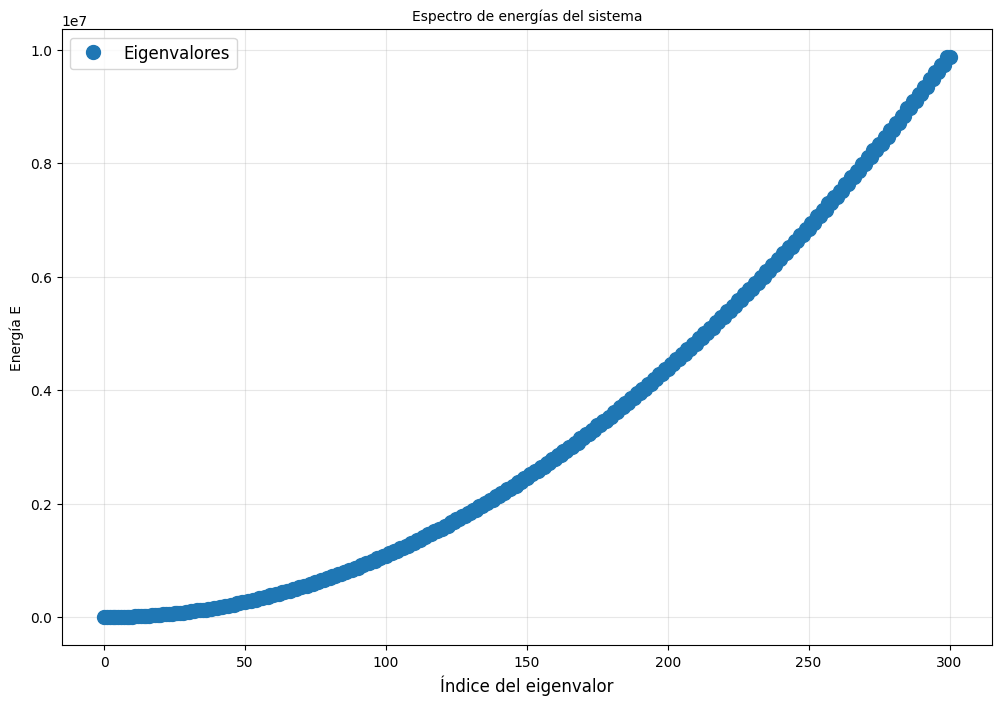

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
g = 1.0          # Constante de interacción
n0 = 1.0         # Densidad del condensado
V = 10.0         # Volumen del sistema
a = 0.001         # Constante de red
num_excitaciones = 300 # Número de modos de excitación (p1, p2, p3, p4, ...)

# Momentos en la primera zona de Bruno
p_vals = np.linspace(-np.pi/a, np.pi/a, num_excitaciones)

# Energías cinéticas correspondientes: epsilon_p = p^2 / 2m (usamos m=1)
epsilon_p = 0.5 * p_vals**2

# Relación de dispersión de Bogoliubov
E_p = np.sqrt(epsilon_p * (epsilon_p + 2 * g * n0))

# La matriz Hamiltoniana H
H = np.zeros((num_excitaciones + 1, num_excitaciones + 1))

# Elemento H[0,0]: Energía del condensado
H[0, 0] = g * n0

# Prinmera fila y columna
for k in range(1, num_excitaciones+1):
    H[0, k] = g * np.sqrt(n0) / np.sqrt(V)
    H[k, 0] = H[0, k]

# diagonal y no diagonal
for k in range(1, num_excitaciones + 1):
    # Términos diagonales: E_p + epsilon_p + g/V
    H[k, k] = E_p[k-1] + epsilon_p[k-1] + g / V
    # Términos no diagonales (g/V )
    for l in range(1, num_excitaciones + 1):
        if k != l:
            H[k, l] = g / V

# Diagonalización de la matriz H
E, Phi = np.linalg.eigh(H)  # E: eigenvalores, Phi: eigenvectores (columnas)

# ResultadosResultadosh
print("Matriz Hamiltoniana H:")
print(np.round(H, 3))
print("\nEnergías (eigenvalores E):", np.round(E, 3))
print("\nEigenvectores (columnas de Phi):")
print(np.round(Phi, 3))

# Grafica de las energias
plt.figure(figsize=(12, 8))
plt.plot(E, 'o', markersize=10, label='Eigenvalores')
plt.xlabel('Índice del eigenvalor', fontsize=12)
plt.ylabel('Energía E', fontsize=10)
plt.title('Espectro de energías del sistema', fontsize=10)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

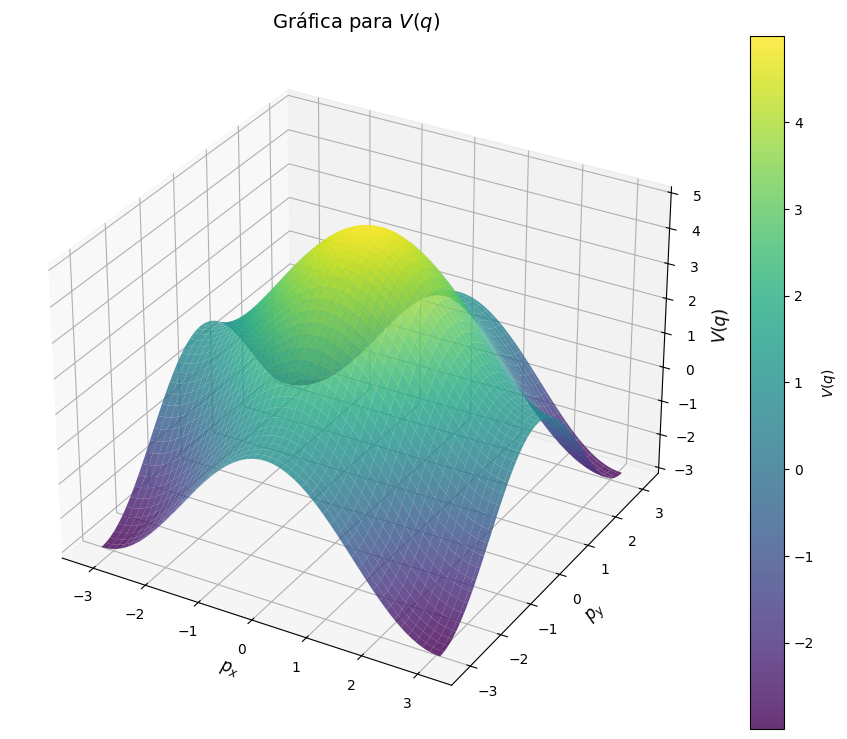

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
U_0= 1  # Tunelaje
U_I= 1.0
a = 1   # Constante de red
rx = np.array([1, 0])
ry = np.array([0, 1])

# Malla de momentos en 2D
p_vals = np.linspace(-np.pi/a, np.pi/a, 100)
p_x, p_y = np.meshgrid(p_vals, p_vals)

# Producto punto p · r
producto1 = p_x * rx[0] + p_y * rx[1]  # = p_x
producto2 = p_x * ry[0] + p_y * ry[1]  # = p_y

# Energía
V = U_0 + 2 * U_I * (np.cos(producto1) + np.cos(producto2))


# --- Gráfica 3D ---
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(p_x, p_y, V, cmap='viridis', alpha=0.8)
fig.colorbar(surf, label='$V(q)$')
ax.set_xlabel('$p_x$', fontsize=12)
ax.set_ylabel('$p_y$', fontsize=12)
ax.set_zlabel('$V(q)$', fontsize=12)
ax.set_title(f'Gráfica para $V(q)$', fontsize=14)
plt.show()